In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from connect4.agent.q_learn import QLearnTrain
from connect4.agent.random_agent import RandomAgent
from connect4.agent.min_max import MinMaxAgentWAlphaBeta
from connect4.agent.monte_carlo import MonteCarlo
from connect4.evaluator import AdvancedScore

from matplotlib import pyplot as plt
from time import time

In [3]:
def plot_train_data(rounds, t, name, half):
    x = [x for x in range(0, rounds, int(rounds/t.resolution))]
    if half==1:
        win = [x[0] for x in t.win_loose[:t.resolution]]
        loose = [x[1] for x in t.win_loose[:t.resolution]]
        draw = [x[2] for x in t.win_loose[:t.resolution]]
        dist = [x[1]-x[0] for x in t.win_loose[:t.resolution]]
    else:
        win = [x[1] for x in t.win_loose[t.resolution:]]
        loose = [x[0] for x in t.win_loose[t.resolution:]]
        draw = [x[2] for x in t.win_loose[t.resolution:]]
        dist = [x[0]-x[1] for x in t.win_loose[t.resolution:]]
        
    plt.plot(x, win, label='win')
    plt.plot(x, loose, label='loose')
    plt.plot(x, draw, label='draw')
    plt.plot(x, dist, label='distance')
    
    plt.xlabel('Round')
    plt.ylabel('Piece')
    plt.title(f'{name}_{rounds}_p{half}')
    
    plt.legend()
    plt.grid()
    
    plt.show()

In [4]:
def train(against=None, rounds=10_000, name=''):
    t = QLearnTrain()
       
    start_time = time()
    t.learn(rounds, against=against, name=name)
    print(f'time: {time() - start_time}s')
    
    plot_train_data(rounds,t,name,1)
    if against is not None:
        plot_train_data(rounds,t,name,2)

iteration: 0.
iteration: 500.
iteration: 1000.
iteration: 1500.
iteration: 2000.
iteration: 2500.
iteration: 3000.
iteration: 3500.
iteration: 4000.
iteration: 4500.
iteration: 5000.
iteration: 5500.
iteration: 6000.
iteration: 6500.
iteration: 7000.
iteration: 7500.
iteration: 8000.
iteration: 8500.
iteration: 9000.
iteration: 9500.
p1: 66, p2: 9924, d: 10
iteration: 0.
iteration: 500.
iteration: 1000.
iteration: 1500.
iteration: 2000.
iteration: 2500.
iteration: 3000.
iteration: 3500.
iteration: 4000.
iteration: 4500.
iteration: 5000.
iteration: 5500.
iteration: 6000.
iteration: 6500.
iteration: 7000.
iteration: 7500.
iteration: 8000.
iteration: 8500.
iteration: 9000.
iteration: 9500.
p1: 8965, p2: 1034, d: 1
save model as: MinMax_4deep_20191211_220946
time: 10697.287880897522s


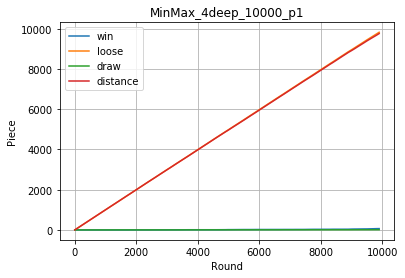

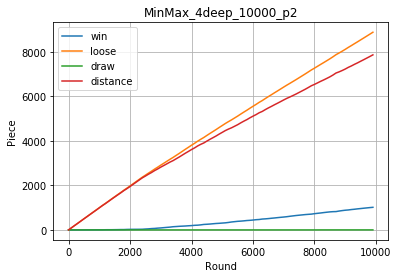

In [5]:
adv = AdvancedScore()
train(MinMaxAgentWAlphaBeta(4, adv.score),name='MinMax_4deep')

In [ ]:
adv = AdvancedScore()
train(MinMaxAgentWAlphaBeta(4, adv.score), rounds=20_000, name='MinMax_4deep')

iteration: 0.
iteration: 1000.
iteration: 2000.
iteration: 3000.
iteration: 4000.
iteration: 5000.
iteration: 6000.
